In [ ]:
# Importar datos desde GitHub
URL = 'https://raw.githubusercontent.com/flordelarosa/Florencia_IFRPD-delaRosa/main/diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(URL)

# Verificar el tamaño del archivo descargado
import os

file_path = 'diabetes_012_health_indicators_BRFSS2015.csv'

if os.path.exists(file_path):
    if os.path.getsize(file_path) > 0:
        # Importar las bibliotecas necesarias
        import pandas as pd

        # Leer el archivo CSV
        df = pd.read_csv(file_path)

        # Mostrar las primeras filas del dataframe para verificar que se haya cargado correctamente
        print(df.head())
        print(df.info())
        print(df.columns)
    else:
        print("El archivo está vacío.")
else:
    print("El archivo no se descargó correctamente.")


   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
# Leer el archivo CSV
file_path = 'diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file_path)

# Exploración Inicial de Datos
print(df.info())
print(df.shape)
print(df.describe())

# Búsqueda de Valores Nulos o Duplicados
print("Valores Nulos:\n", df.isnull().sum())
print("Duplicados:\n", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# Manejo de valores nulos (si los hay)
df = df.dropna()

# Eliminación de duplicados
df = df.drop_duplicates()

In [ ]:
# Separar las características y la variable objetivo
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Utilizar SelectKBest para seleccionar las mejores características
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Obtener los puntajes de las características
scores = selector.scores_

# Crear un dataframe con los puntajes de las características
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print("Puntuaciones de las Características:\n", feature_scores)

Puntuaciones de las Características:
                  Feature         Score
13               GenHlth  10169.183031
0                 HighBP   8497.731210
3                    BMI   5436.169942
16              DiffWalk   5338.484795
1               HighChol   5031.538973
18                   Age   4113.079874
6   HeartDiseaseorAttack   3454.831926
15              PhysHlth   3040.491212
20                Income   2577.828679
19             Education   1372.864590
7           PhysActivity   1243.755090
5                 Stroke   1169.622983
2              CholCheck    673.084842
10     HvyAlcoholConsump    520.646778
14              MentHlth    399.007638
4                 Smoker    252.190863
9                Veggies    218.640343
17                   Sex    122.281148
12           NoDocbcCost     89.983387
8                 Fruits     74.545687
11         AnyHealthcare     73.141872


In [ ]:
# Separar las características y la variable objetivo
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Utilizar SelectKBest para seleccionar las mejores características
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Obtener los puntajes de las características
scores = selector.scores_

# Crear un dataframe con los puntajes de las características
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print("Puntuaciones de las Características:\n", feature_scores)

Puntuaciones de las Características:
                  Feature         Score
13               GenHlth  10169.183031
0                 HighBP   8497.731210
3                    BMI   5436.169942
16              DiffWalk   5338.484795
1               HighChol   5031.538973
18                   Age   4113.079874
6   HeartDiseaseorAttack   3454.831926
15              PhysHlth   3040.491212
20                Income   2577.828679
19             Education   1372.864590
7           PhysActivity   1243.755090
5                 Stroke   1169.622983
2              CholCheck    673.084842
10     HvyAlcoholConsump    520.646778
14              MentHlth    399.007638
4                 Smoker    252.190863
9                Veggies    218.640343
17                   Sex    122.281148
12           NoDocbcCost     89.983387
8                 Fruits     74.545687
11         AnyHealthcare     73.141872


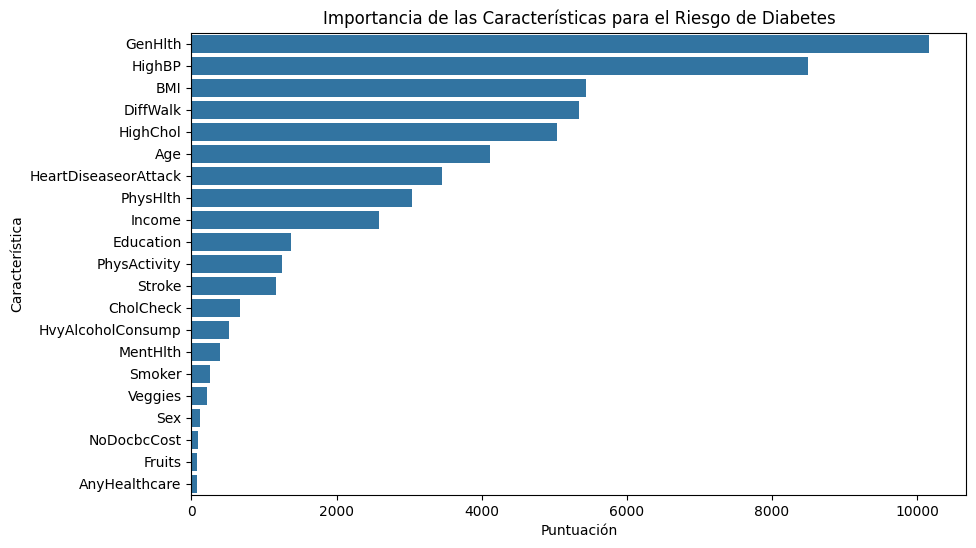

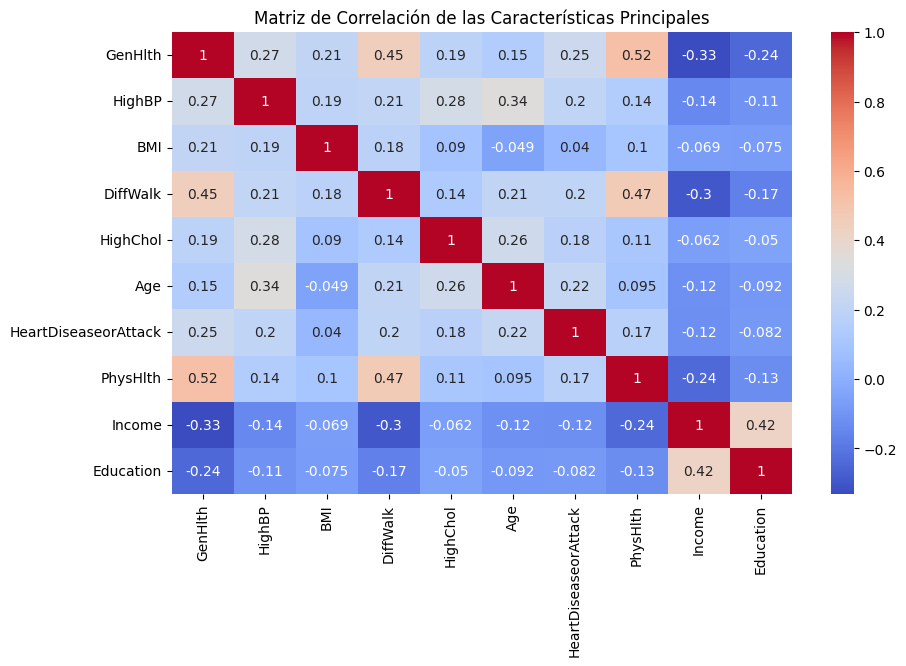

In [ ]:
# Visualizar los factores de riesgo más importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Importancia de las Características para el Riesgo de Diabetes')
plt.xlabel('Puntuación')
plt.ylabel('Característica')
plt.show()

# Analizar la correlación entre las características principales y el riesgo de diabetes
top_features = feature_scores['Feature'].head(10).values
corr_matrix = df[top_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de las Características Principales')
plt.show()

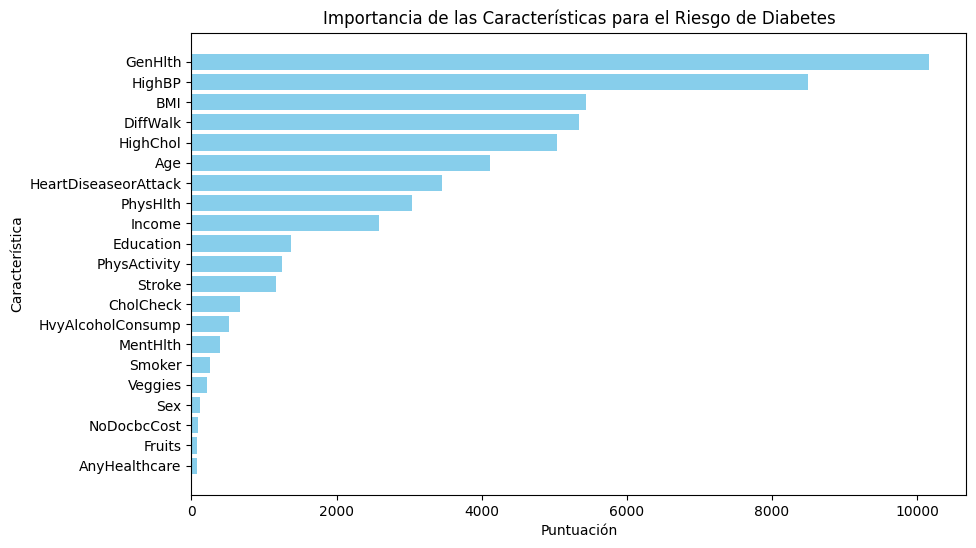

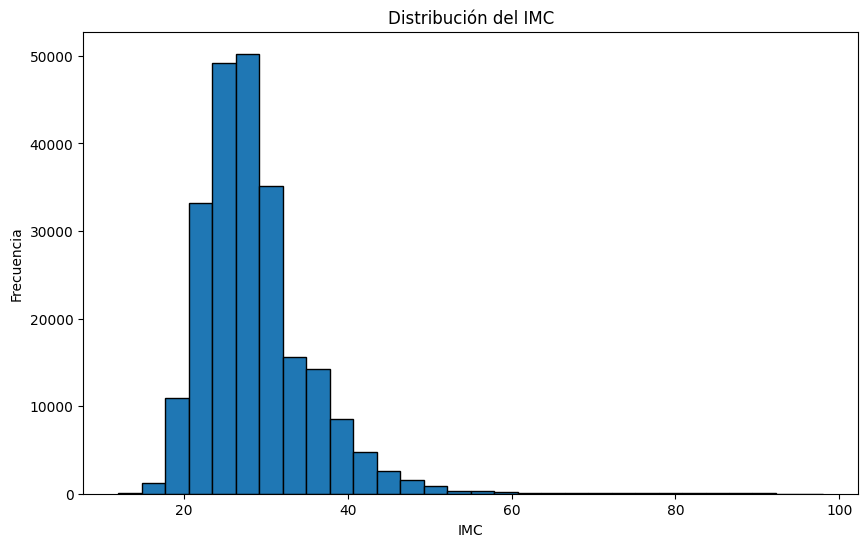

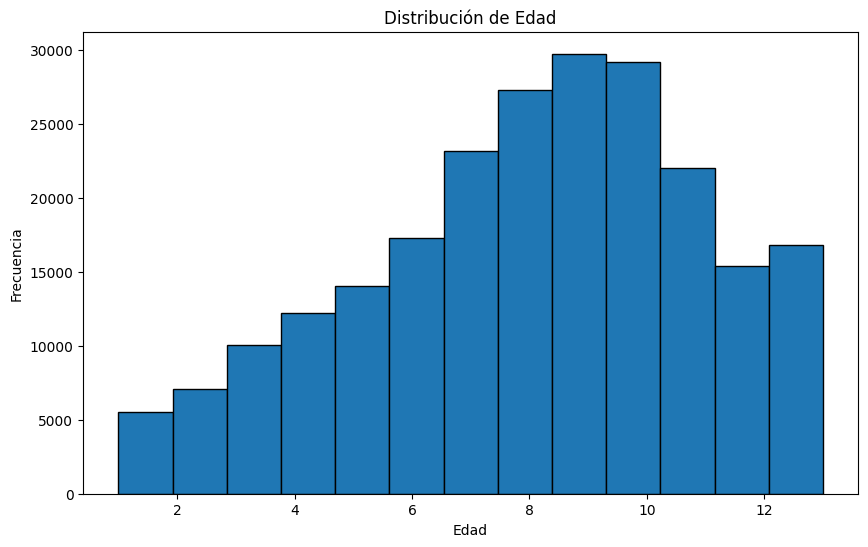

In [ ]:
# Visualizar los factores de riesgo más importantes con Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(feature_scores['Feature'], feature_scores['Score'], color='skyblue')
plt.title('Importancia de las Características para el Riesgo de Diabetes')
plt.xlabel('Puntuación')
plt.ylabel('Característica')
plt.gca().invert_yaxis()
plt.show()

# Histograma de la variable BMI
plt.figure(figsize=(10, 6))
plt.hist(df['BMI'], bins=30, edgecolor='k')
plt.title('Distribución del IMC')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la variable Age
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=13, edgecolor='k')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

<ipython-input-14-2bb463001ed8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=feature_scores, palette='viridis')


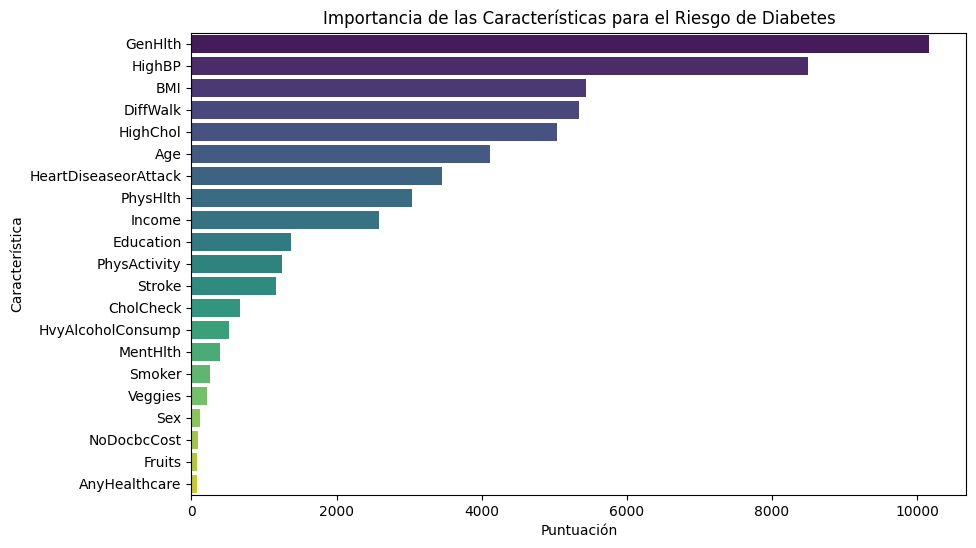

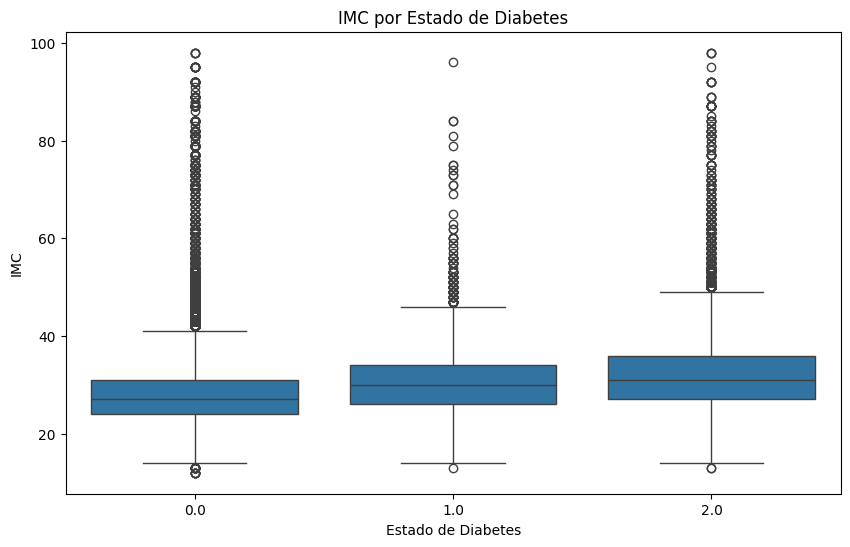

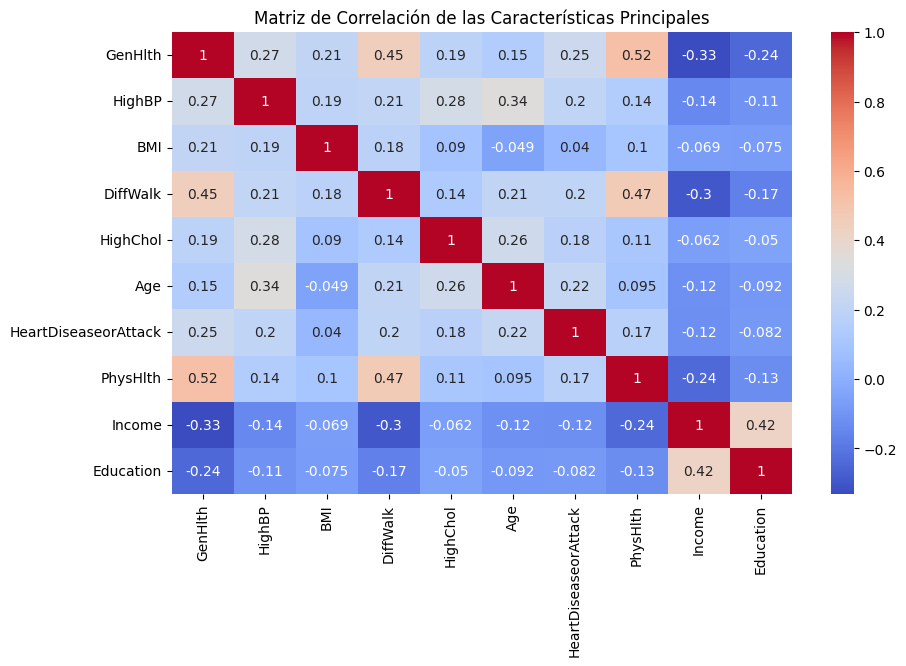

In [ ]:
# Visualizar los factores de riesgo más importantes con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores, palette='viridis')
plt.title('Importancia de las Características para el Riesgo de Diabetes')
plt.xlabel('Puntuación')
plt.ylabel('Característica')
plt.show()

# Boxplot de IMC por estado de diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y='BMI', data=df)
plt.title('IMC por Estado de Diabetes')
plt.xlabel('Estado de Diabetes')
plt.ylabel('IMC')
plt.show()

# Mapa de calor de correlación de las características principales
top_features = feature_scores['Feature'].head(10).values
corr_matrix = df[top_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de las Características Principales')
plt.show()